In [177]:
from pyforest import *
from sklearn.preprocessing import StandardScaler, scale
from sklearn.preprocessing import RobustScaler, robust_scale
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, maxabs_scale, minmax_scale

In [7]:
absenteeism_data = pd.read_csv('Absenteeism_at_work.csv', delimiter = ';')

In [8]:
absenteeism_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [78]:
absenteeism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [95]:
absenteeism_data = absenteeism_data.astype(np.float64)

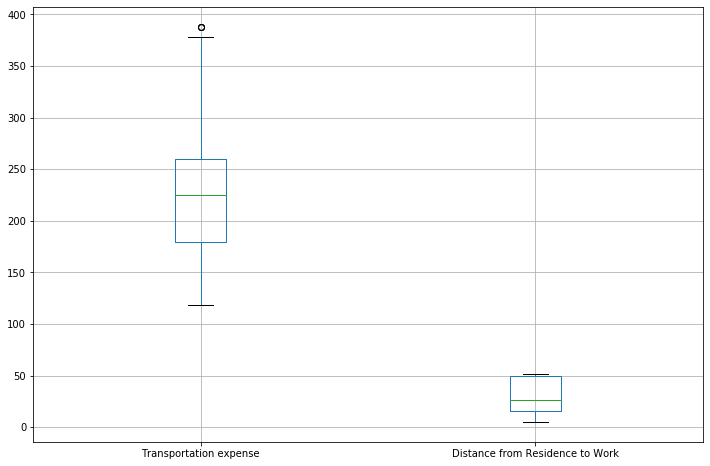

In [133]:
absenteeism_data.boxplot(column=['Transportation expense', 'Distance from Residence to Work'], figsize=(12,8))

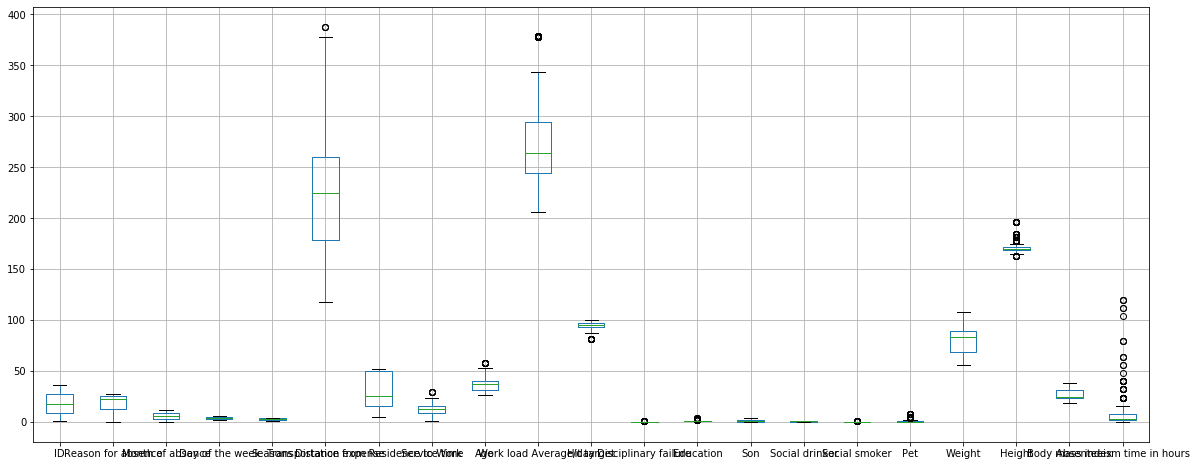

In [137]:
absenteeism_data.boxplot(figsize=(20,8))

### Scaling

In [144]:
scaled_df = pd.DataFrame()

scaled_df['Transportation'] = scale(absenteeism_data['Transportation expense'])
scaled_df['Distance'] = scale(absenteeism_data['Distance from Residence to Work'])
scaled_df['Absent Hours'] = scale(absenteeism_data['Absenteeism time in hours'])

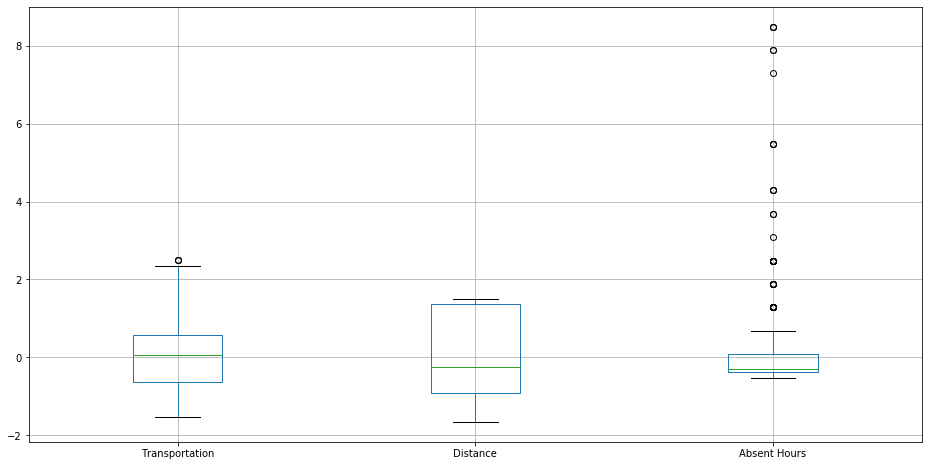

In [145]:
scaled_df.boxplot(figsize=(16,8))

In [141]:
scaled_df.describe()

,Transportation,Distance
count,7.400000e+02,7.400000e+02
mean,6.601326e-17,-5.911187e-17
std,1.000676e+00,1.000676e+00
min,-1.544379e+00,-1.661258e+00
25%,-6.326655e-01,-9.193567e-01
50%,5.485632e-02,-2.449005e-01
75%,5.779707e-01,1.373794e+00
max,2.491075e+00,1.508686e+00


In [148]:
scaled_df = pd.DataFrame(scale(absenteeism_data))

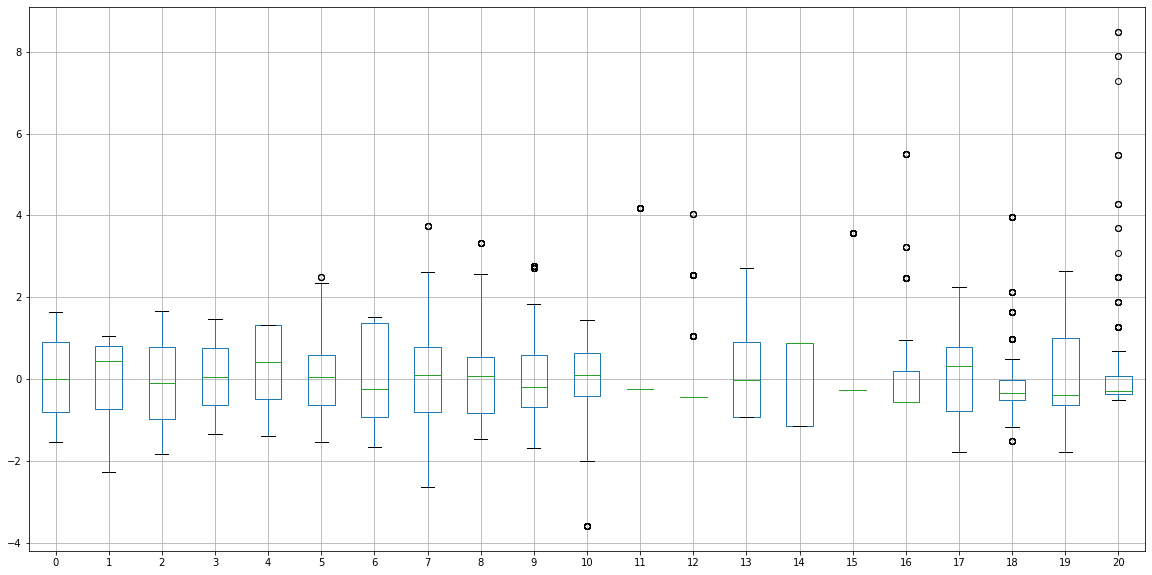

In [149]:
scaled_df.boxplot(figsize=(20,10))

In [150]:
std_scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
std_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [151]:
std_scaler.fit(absenteeism_data) # computes std and mean

StandardScaler(copy=True, with_mean=True, with_std=True)

In [152]:
scaled_array = std_scaler.transform(absenteeism_data)

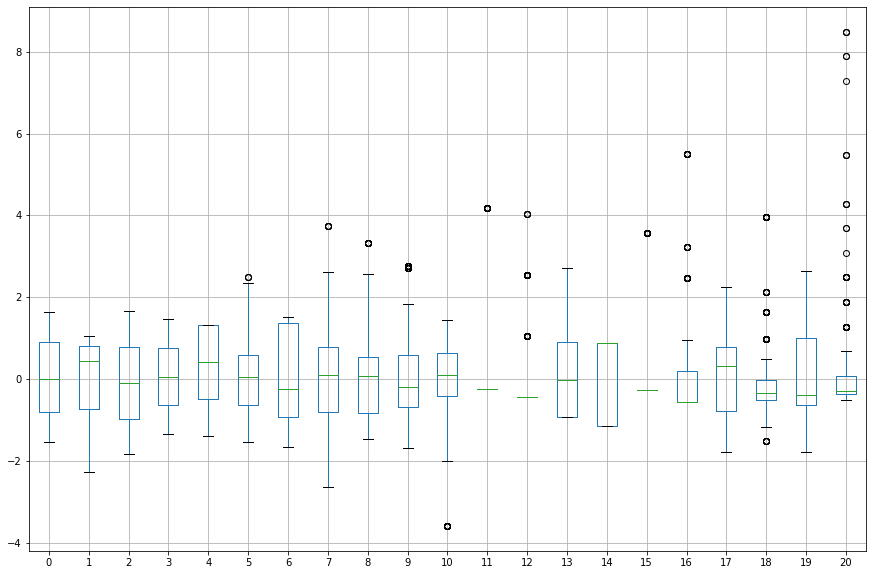

In [153]:
pd.DataFrame(scaled_array).boxplot(figsize=(15,10))

In [154]:
std_scaler.mean_

array([1.80175676e+01, 1.92162162e+01, 6.32432432e+00, 3.91486486e+00,
       2.54459459e+00, 2.21329730e+02, 2.96310811e+01, 1.25540541e+01,
       3.64500000e+01, 2.71490235e+02, 9.45878378e+01, 5.40540541e-02,
       1.29189189e+00, 1.01891892e+00, 5.67567568e-01, 7.29729730e-02,
       7.45945946e-01, 7.90351351e+01, 1.72114865e+02, 2.66770270e+01,
       6.92432432e+00])

In [155]:
std_scaler.var_

array([1.21303745e+02, 7.10262235e+01, 1.17921110e+01, 2.01842768e+00,
       1.23449781e+00, 4.47654263e+03, 2.19832818e+02, 1.92011322e+01,
       4.19177703e+01, 1.52347490e+03, 1.42639061e+01, 5.11322133e-02,
       4.52636961e-01, 1.20504748e+00, 2.45434624e-01, 6.76479182e-02,
       1.73545654e+00, 1.65752820e+02, 3.63719412e+01, 1.83402831e+01,
       1.77475354e+02])

In [156]:
std_scaler.scale_

array([11.01379796,  8.42770571,  3.43396433,  1.42071379,  1.11107957,
       66.90696996, 14.82676019,  4.38190965,  6.47439343, 39.03171665,
        3.77675868,  0.22612433,  0.672783  ,  1.09774655,  0.49541359,
        0.26009213,  1.31736728, 12.87450269,  6.03091545,  4.28255567,
       13.32198762])

(array([ 92.,  36., 195.,  81., 129.,  51.,  90.,  16.,   0.,  50.]),
 array([118., 145., 172., 199., 226., 253., 280., 307., 334., 361., 388.]),
 <a list of 10 Patch objects>)

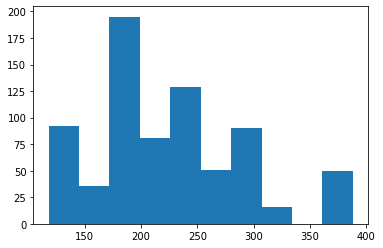

In [159]:
plt.hist(absenteeism_data['Transportation expense'])

#### Robust Scaler

In [161]:
absenteeism_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [162]:
robust_scaled = pd.DataFrame()
robust_scaled['Robust_Workload'] = robust_scale(absenteeism_data['Work load Average/day '])
robust_scaled['Robust_Height'] = robust_scale(absenteeism_data['Height'])
robust_scaled['Robust_AbsentHours'] = robust_scale(absenteeism_data['Absenteeism time in hours'])

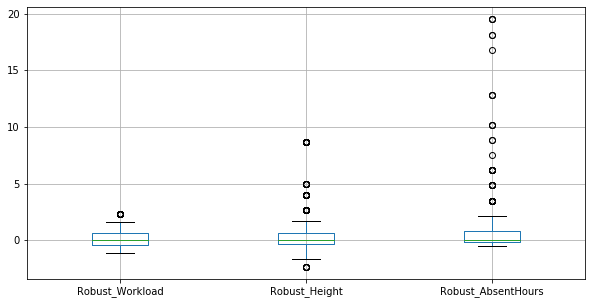

In [168]:
robust_scaled.boxplot(figsize=(10,5))

In [169]:
robust_scaler = RobustScaler(copy=True, with_centering=True, with_scaling=True)

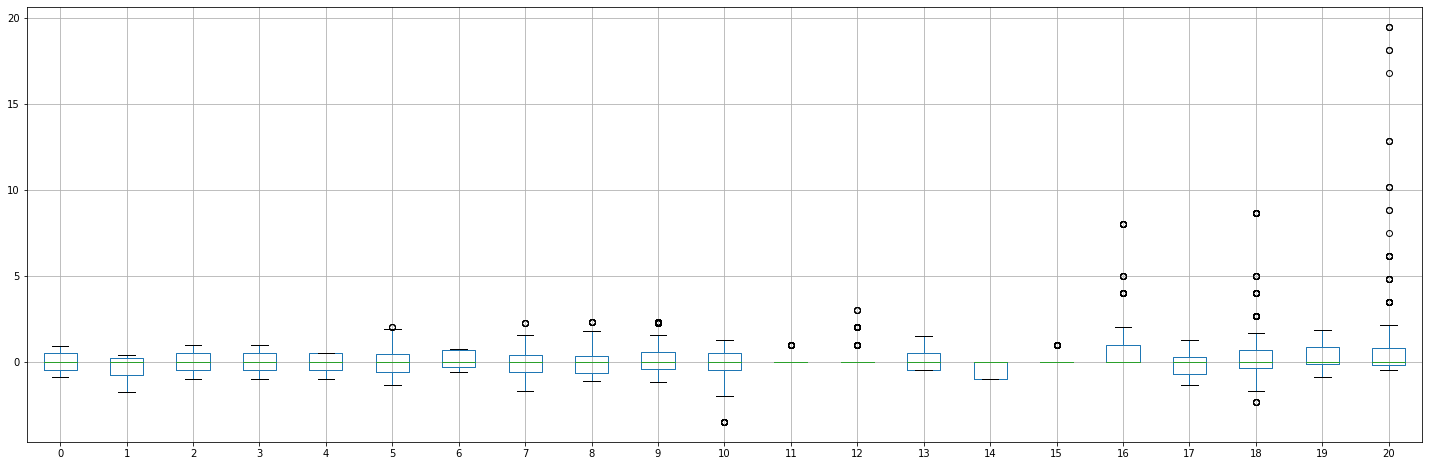

In [175]:
absenteeism_data = pd.DataFrame(robust_scaler.fit_transform(absenteeism_data))

absenteeism_data.boxplot(figsize=(25,8))

In [178]:
scaled_df = pd.DataFrame(maxabs_scale(absenteeism_data), columns = absenteeism_data.columns)

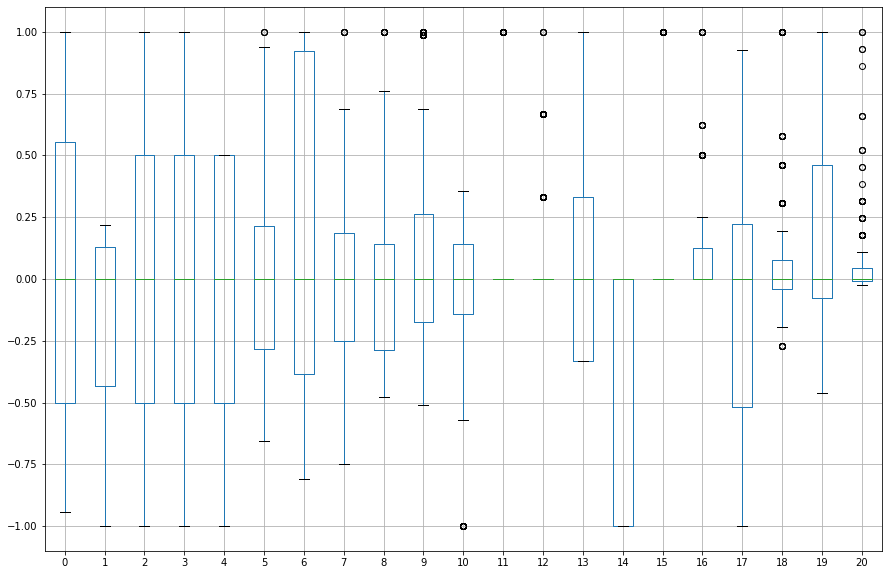

In [180]:
scaled_df.boxplot(figsize=(15,10))

In [182]:
# scaled_df.min()

In [183]:
max_abs_scaler = MaxAbsScaler()

In [185]:
minMaxScaler = MinMaxScaler()
scaled = minMaxScaler.fit_transform(absenteeism_data)

In [187]:
scaled_df = pd.DataFrame(scaled, columns = absenteeism_data.columns)
scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.285714,0.928571,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,1.000000,0.000000,0.583333,0.25,0.000000,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.000000,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.057143,0.821429,0.583333,0.50,0.000000,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.000000,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.171429,0.250000,0.583333,0.75,0.000000,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.000000,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.285714,0.821429,0.583333,0.75,0.000000,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.285714,0.500000,0.583333,0.25,0.000000,0.633333,0.659574,0.428571,0.193548,0.339296,0.631579,0.0,0.000000,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.066667
736,0.000000,0.392857,0.583333,0.25,0.000000,0.433333,0.127660,0.464286,0.322581,0.339296,0.631579,0.0,0.666667,0.25,0.0,0.0,0.125,0.615385,0.272727,0.526316,0.033333
737,0.085714,0.000000,0.000000,0.25,0.000000,0.000000,0.191489,0.428571,0.419355,0.377540,0.736842,0.0,0.000000,0.25,1.0,0.0,1.000,0.807692,0.212121,0.789474,0.000000
738,0.200000,0.000000,0.000000,0.50,0.333333,0.418519,0.638298,0.464286,0.387097,0.377540,0.736842,0.0,0.000000,0.50,1.0,0.0,0.250,0.846154,0.212121,0.842105,0.000000
